# Benchmark Comparison

## Minimum and Standard Deviation of Distance in Log 10

In [1]:
import re
import csv
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


def show(benchmark_name):
    fig = plt.figure(figsize=(12, 4), dpi=100)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.suptitle(benchmark_name.capitalize(), fontsize=18, y=1.02)
    ax1.set_title('Minimum Distance in Log 10')
    ax2.set_title('Standard Deviation of Distance in Log 10')
    
    data = {}
    paths = glob(f'../data/{benchmark_name}_*/result.csv')
    paths.sort()
    for path in paths:
        optimizer_name = re.search(r'../data/.+_(.+)/result\.csv', path).group(1)
        with open(path) as f:
            rows = np.array([row for row in csv.reader(f)])
        row = rows[1:, 1:]
        row = row.reshape(len(row))
        row = row.astype(np.float)
        data[optimizer_name] = row
    
    optimizer_names, ys = list(data.keys()), list(data.values())
    ys = np.log10(ys)
    min_ys = [np.min(y) for y in ys]
    std_ys = [np.std(y) for y in ys]
    x = [i for i in range(len(ys))]
    
    d = (max(min_ys) - min(min_ys)) / 10
    ax1.set_ylim(min(min_ys) - d, max(min_ys) + d)
    
    d = (max(std_ys) - min(std_ys)) / 10
    ax2.set_ylim(min(std_ys) - d, max(std_ys) + d)
    
    ax1.bar(x, np.array(min_ys) - min(min_ys) + d / 20, align='center', tick_label=optimizer_names, bottom=min(min_ys) - d / 20)
    ax2.bar(x, std_ys, align='center', tick_label=optimizer_names)
    ax1.set_xticklabels(optimizer_names, rotation=45)
    ax2.set_xticklabels(optimizer_names, rotation=45)

    plt.show()

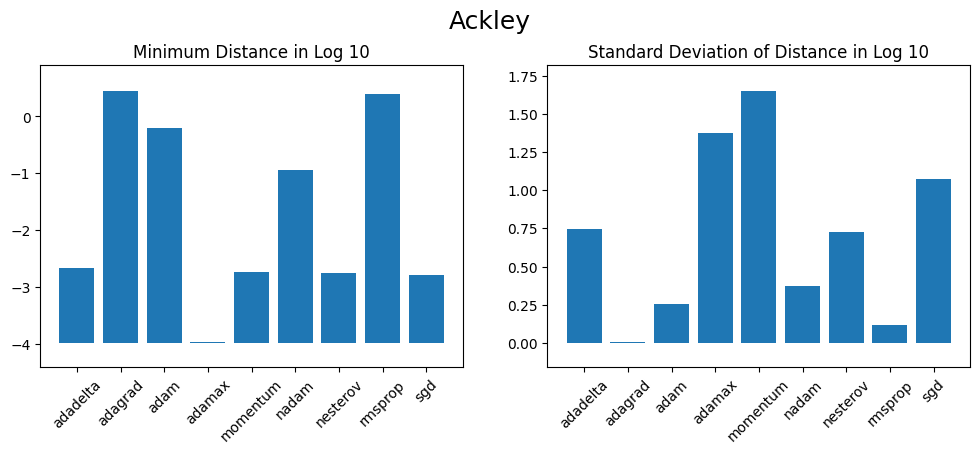

In [166]:
show('ackley')

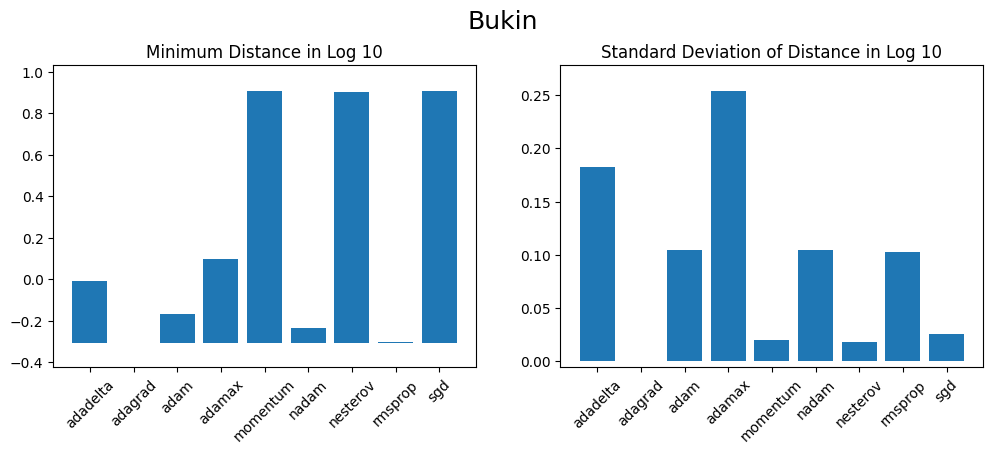

In [167]:
show('bukin')

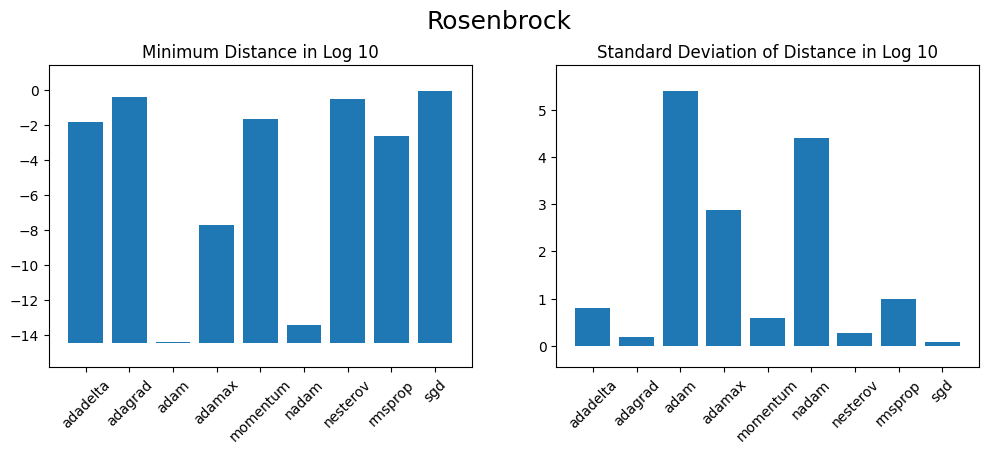

In [168]:
show('rosenbrock')

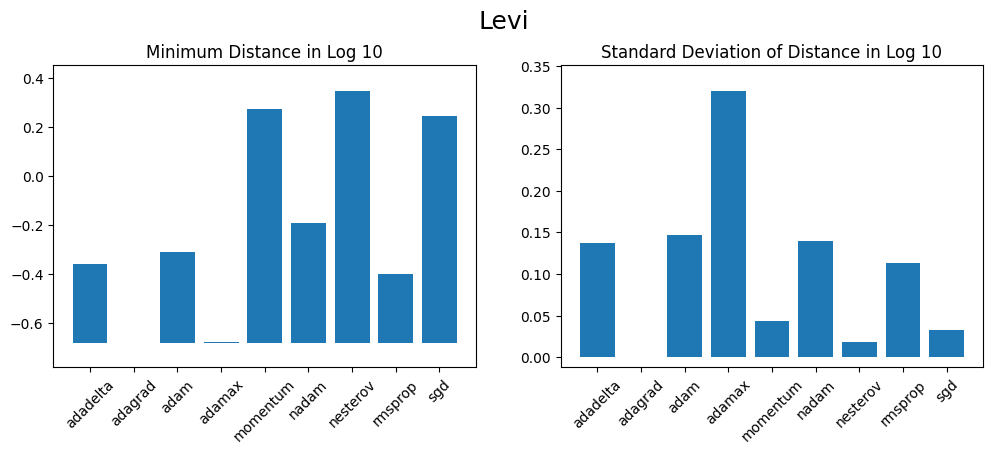

In [169]:
show('levi')

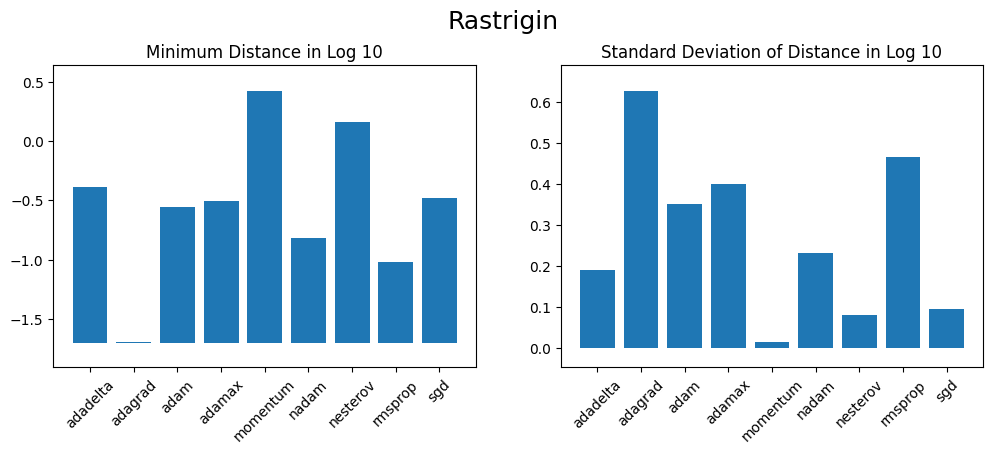

In [170]:
show('rastrigin')